In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pt

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
training_set = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = trans)
testing_set = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = trans)

train_loader = torch.utils.data.DataLoader(training_set, batch_size=128)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=64)

In [2]:
#Construct the CNN Models
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(5, 15, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(735, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

model_1 = CNN_1()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.001)
    
    
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(1568, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
    
model_2 = CNN_2()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr=0.001)
    
    
class CNN_3(nn.Module):
    def __init__(self):
        super(CNN_3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(3136, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.log_softmax(x, dim=1)
    
model_3 = CNN_3()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

In [3]:
def train_and_test_model(model, optimizer, trainloader, testloader, number, epochs=10):
    model.train()
    losses, accuracies = [], []
    epoch = 0
    print(f'Training Model {number}:')
    while epoch < epochs:
        total_train_loss = 0.0
        actual_train = 0.0
        train_samples = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            predicted_outputs = model(inputs)
            loss = criterion(predicted_outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            predicted_labels = predicted_outputs.argmax(dim=1)
            train_samples += labels.size(0)
            actual_train += (predicted_labels == labels).sum().item()
            
        train_loss = (total_train_loss / len(trainloader))
        losses.append(train_loss)
        
        train_accuracy = 100 * actual_train / train_samples
        accuracies.append(train_accuracy)
        print(f'Epoch: {epoch+1}, Train Loss: {train_loss}, Accuracy: {train_accuracy}')
        epoch +=1
    return losses, accuracies

losses_1, accuracies_1 = train_and_test_model(model_1, optimizer_1, train_loader, test_loader, 1)
losses_2, accuracies_2 = train_and_test_model(model_2, optimizer_2, train_loader, test_loader, 2)
losses_3, accuracies_3 = train_and_test_model(model_3, optimizer_3, train_loader, test_loader, 3)

Training Model 1:
Epoch: 1, Train Loss: 0.3352624491663344, Accuracy: 90.745
Epoch: 2, Train Loss: 0.09228382945986095, Accuracy: 97.21333333333334
Epoch: 3, Train Loss: 0.06233808618169953, Accuracy: 98.12333333333333
Epoch: 4, Train Loss: 0.04819505818998381, Accuracy: 98.53
Epoch: 5, Train Loss: 0.038694851395330514, Accuracy: 98.81333333333333
Epoch: 6, Train Loss: 0.03156698793498005, Accuracy: 99.03666666666666
Epoch: 7, Train Loss: 0.025472905819065004, Accuracy: 99.23333333333333
Epoch: 8, Train Loss: 0.02096231719808012, Accuracy: 99.35166666666667
Epoch: 9, Train Loss: 0.017104139989698994, Accuracy: 99.48833333333333
Epoch: 10, Train Loss: 0.013685358572979615, Accuracy: 99.58833333333334
Training Model 2:
Epoch: 1, Train Loss: 0.2300856550703687, Accuracy: 93.225
Epoch: 2, Train Loss: 0.06034933357710031, Accuracy: 98.15666666666667
Epoch: 3, Train Loss: 0.04161307569826518, Accuracy: 98.76666666666667
Epoch: 4, Train Loss: 0.03141215276565087, Accuracy: 99.04166666666667
E

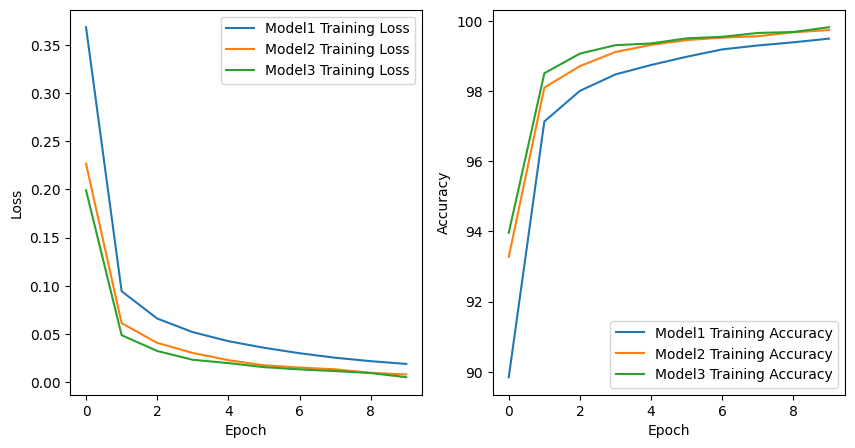

In [5]:
pt.figure(figsize=(10,5))
pt.subplot(1,2,1)
pt.plot(losses_1, label = 'Model1 Training Loss')
pt.plot(losses_2, label = 'Model2 Training Loss')
pt.plot(losses_3, label = 'Model3 Training Loss')
pt.xlabel('Epoch')
pt.ylabel('Loss')
pt.legend()

pt.subplot(1,2,2)
pt.plot(accuracies_1, label = 'Model1 Training Accuracy')
pt.plot(accuracies_2, label = 'Model2 Training Accuracy')
pt.plot(accuracies_3, label = 'Model3 Training Accuracy')
pt.xlabel('Epoch')
pt.ylabel('Accuracy')
pt.legend()